In [1]:
import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\dhruv\Downloads\Instagram-Reach.csv")

In [3]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


In [6]:
df.shape

(365, 2)

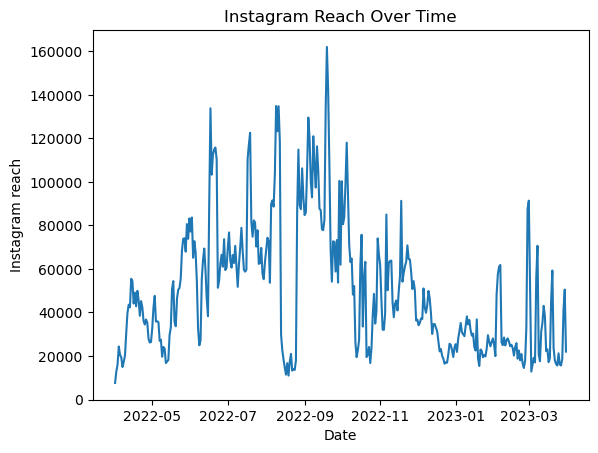

In [7]:
import matplotlib.pyplot as plt

x = df['Date']
y = df['Instagram reach']

# Plotting the data
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.title('Instagram Reach Over Time')
plt.show()


In [8]:
df['Day'] = df['Date'].dt.day_name()
print(df.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [9]:
import numpy as np

day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


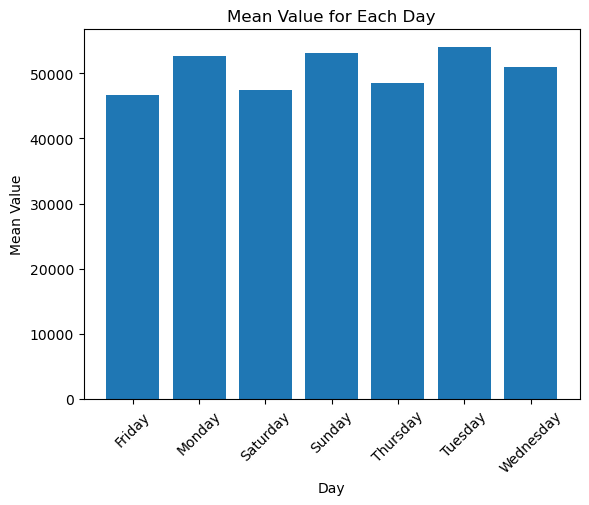

In [10]:
import matplotlib.pyplot as plt

# Assuming 'day_stats' is a DataFrame with columns 'Day' and 'mean'

# Create a line plot
plt.bar(day_stats['Day'], day_stats['mean'], label='Mean')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each Day')
plt.xticks(rotation=45)


# Show the plot
plt.show()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_21360\1757360208.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

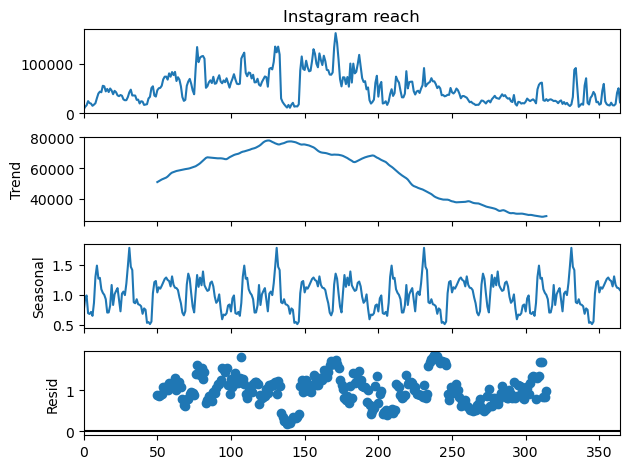

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = df[["Date", "Instagram reach"]]

result = seasonal_decompose(df['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()
fig.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

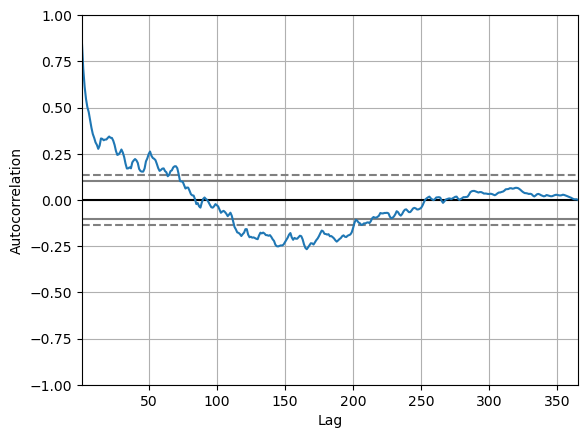

In [12]:
pd.plotting.autocorrelation_plot(df["Instagram reach"])

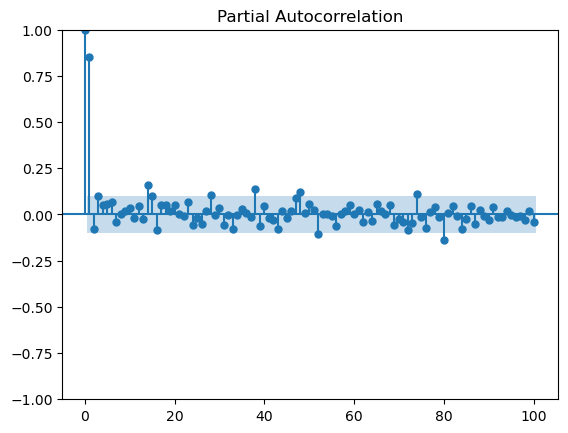

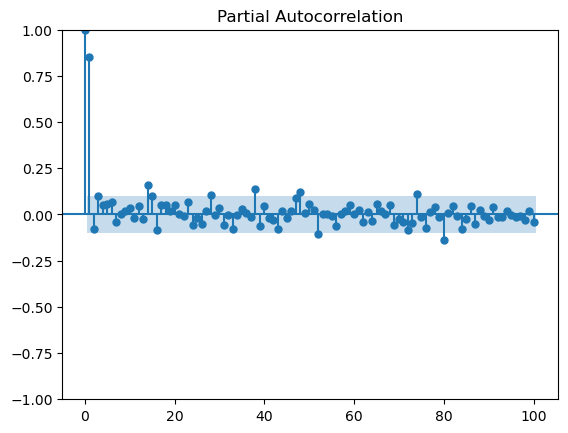

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Instagram reach"], lags = 100)

In [14]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.513
Date:                            Sat, 02 Dec 2023   AIC                           7919.027
Time:                                    17:05:00   BIC                           8000.163
Sample:                                         0   HQIC                          7951.315
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1907      6.372      0.030      0.976     -12.298      12.679
ar.L2          0.4733      5.928   

In [18]:
predictions = model.predict(len(df),len(df)+100)

In [19]:
predictions

365    17439.605278
366    10076.762460
367    12904.662414
368    21288.727144
369    32799.647612
           ...     
461    26919.648104
462     9234.870100
463     9298.116931
464    17046.609163
465    31391.265523
Name: predicted_mean, Length: 101, dtype: float64

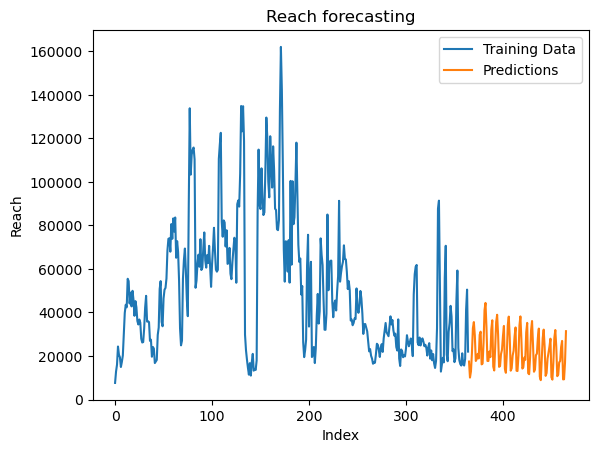

In [24]:
import matplotlib.pyplot as plt

# Plot training data
plt.plot(df.index, df["Instagram reach"], label="Training Data", linestyle="-")

# Plot predictions
plt.plot(predictions.index, predictions, label="Predictions", linestyle="-")

# Add labels and legend
plt.xlabel("Index")
plt.ylabel("Reach")
plt.title("Reach forecasting")
plt.legend()

# Show the plot
plt.show()
